___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [28]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [ ]:
data.

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [51]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [52]:
#f = data.DataReader('F', 'iex', start, end, access_key="sk_1fcd95057a074aeeb85ad44ebcac6152")
bac = data.DataReader('BAC', 'quandl', start, end, access_key="aztM_dNyuyKQ-QTCq4Tu")
c = data.DataReader('C', 'quandl', start, end, access_key="aztM_dNyuyKQ-QTCq4Tu")
gs = data.DataReader('GS', 'quandl', start, end, access_key="aztM_dNyuyKQ-QTCq4Tu")
jpm = data.DataReader('JPM', 'quandl', start, end, access_key="aztM_dNyuyKQ-QTCq4Tu")
ms = data.DataReader('MS', 'quandl', start, end, access_key="aztM_dNyuyKQ-QTCq4Tu")
wfc = data.DataReader('WFC', 'quandl', start, end, access_key="aztM_dNyuyKQ-QTCq4Tu")

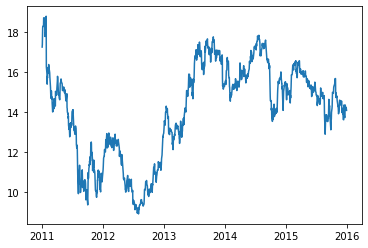

In [53]:
sns.lineplot(data=f['Close'])

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [54]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [59]:
bank_stocks = pd.concat([bac,c,gs,jpm,ms,wfc], axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [101]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [104]:
bank_stocks.sort_values('Date').head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700.0        0.0        1.0   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0        0.0        1.0   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0        0.0        1.0   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0        0.0        1.0   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0        0.0        1.0   

Bank Ticker                                   ...    WFC                    \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...    Low  Close     Volume   
Date                                          ...                            
2006-01-03   37.126108  37.331837  36.516835  ...  62.39  63.80  5508200.0   
2006-01-04   37.189409  37.379312  36.754214  ...  62.73  63.06  5435000.0   
2006-01-05   36.857078  37.054894  36.651349  ...  62.62  62.99  5079000.0   
2006-01-06   37.031156  37.118195  36.675087  ...  62.77  63.36  4201900.0   
2006-01-09   36.967855  37.165671  36.683000  ...  63.11  63.35  2809800.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2006-01-03         0.0        1.0  22.799832  23.070400  22.507619  23.016287   
2006-01-04         0.0        1.0  22.944135  22.958566  22.630277  22.749327   
2006-01-05         0.0        1.0  22.727681  22.767364  22.590594  22.724074   
2006-01-06         0.0        1.0  22.785402  22.926097  22.644707  22.857554   
2006-01-09         0.0        1.0  22.853946  22.962173  22.767364  22.853946   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2006-01-03   11016400.0  
2006-01-04   10870000.0  
2006-01-05   10158000.0  
2006-01-06    8403800.0  
2006-01-09    5619600.0  

[5 rows x 72 columns]

** Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [122]:
#df_tickers = pd.DataFrame(tickers)
#df_tickers.apply(lambda x:bank_stocks.xs(key=x,axis=1))
bank_stocks.xs(key='Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [125]:
returns = bank_stocks.sort_values('Date').xs(key='Close', level='Stock Info', axis=1).pct_change()

In [126]:
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

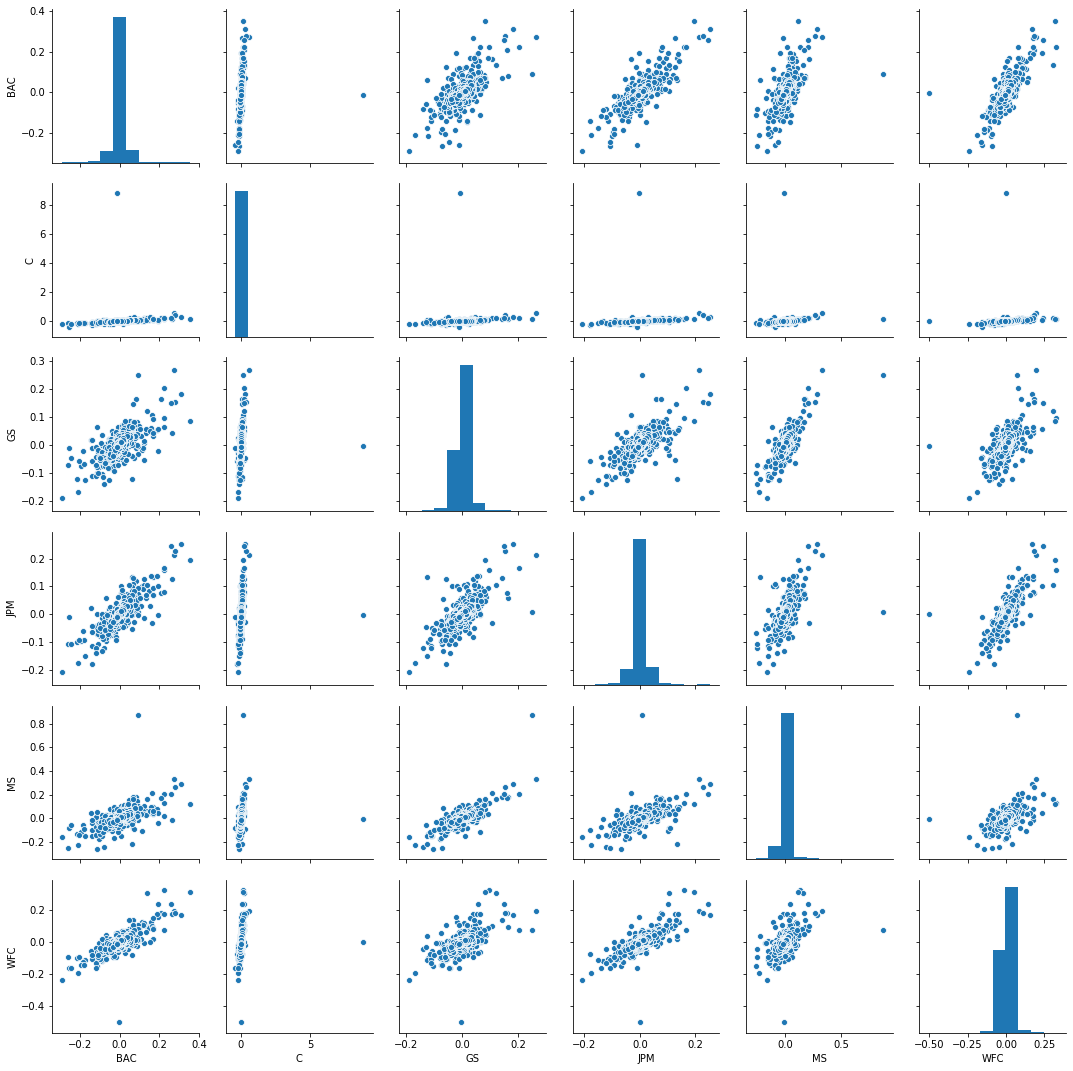

In [128]:
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

In [134]:
returns.idxmin()

Bank Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2006-08-14
dtype: datetime64[ns]

Bank Ticker
BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.502084
dtype: float64

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [136]:
returns.idxmax()

Bank Ticker
BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [139]:
returns.std()

Bank Ticker
BAC    0.036628
C      0.179066
GS     0.025358
JPM    0.027651
MS     0.037820
WFC    0.031838
dtype: float64

In [167]:
returns2015 = returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year) == 2015]
returns2015.head()

Bank Ticker,Date,BAC,C,GS,JPM,MS,WFC
2265,2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2266,2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2267,2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2268,2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2269,2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137


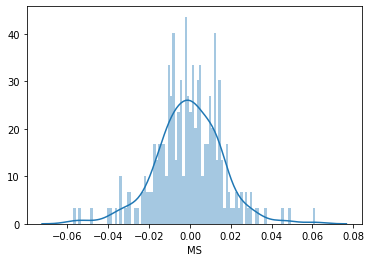

In [176]:
sns.distplot(returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year) == 2015]['MS'],bins=100)

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

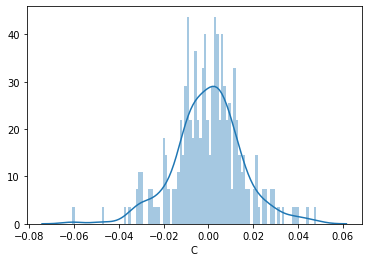

In [174]:
sns.distplot(returns2015['C'],bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

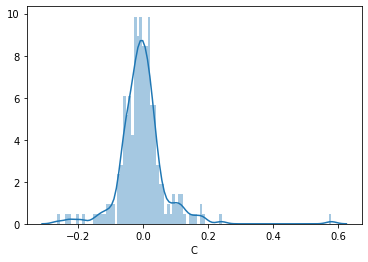

In [177]:
sns.distplot(returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year) == 2008]['C'],bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

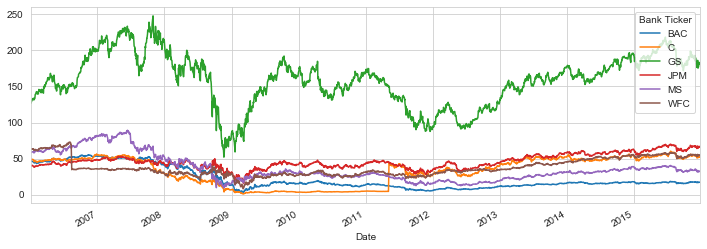

In [252]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot(figsize=(12,4))

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

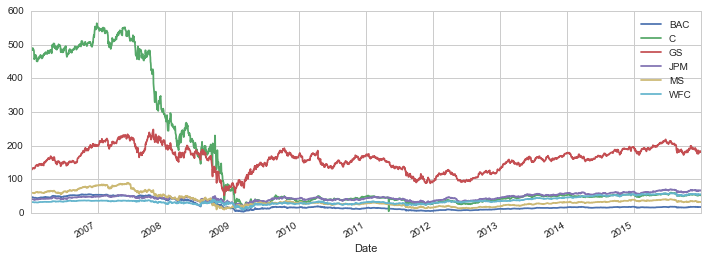

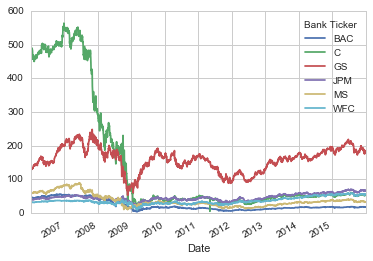

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

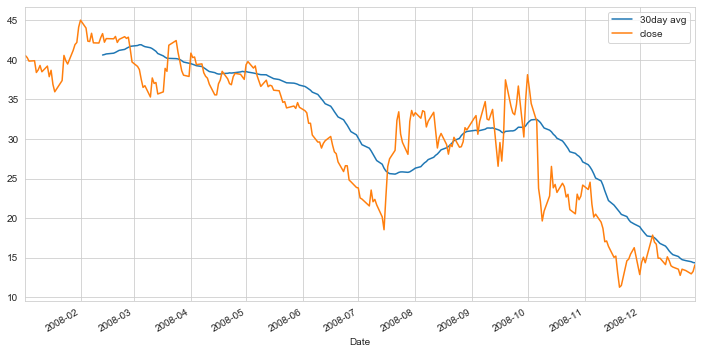

In [258]:
plt.figure(figsize=(12,6))
bank_stocks.sort_values('Date').xs('Close',level='Stock Info',axis=1)['BAC'].loc['2008-01-01':'2009-01-01'].rolling(30).mean().plot(label='30day avg')
bank_stocks.sort_values('Date').xs('Close',level='Stock Info',axis=1)['BAC'].loc['2008-01-01':'2009-01-01'].plot(label='close')
plt.legend()

In [259]:
bank_stocks.sort_values('Date').xs('Close',level='Stock Info',axis=1)['BAC'].loc['2008-01-01':'2009-01-01'].rolling(30).mean()

Date
2008-01-02          NaN
2008-01-03          NaN
2008-01-04          NaN
2008-01-07          NaN
2008-01-08          NaN
                ...    
2008-12-24    14.738667
2008-12-26    14.617333
2008-12-29    14.478667
2008-12-30    14.372667
2008-12-31    14.341000
Name: BAC, Length: 253, dtype: float64

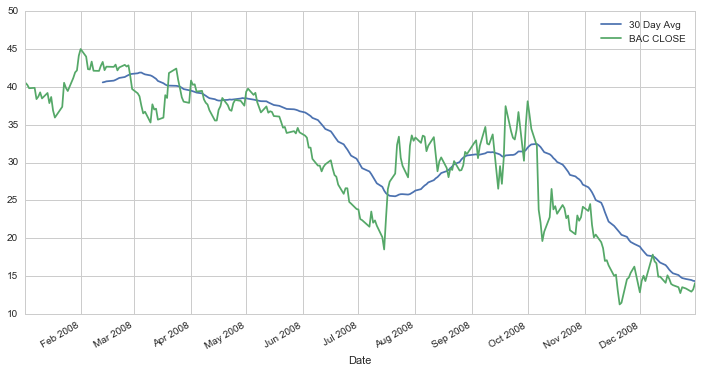

** Create a heatmap of the correlation between the stocks Close Price.**

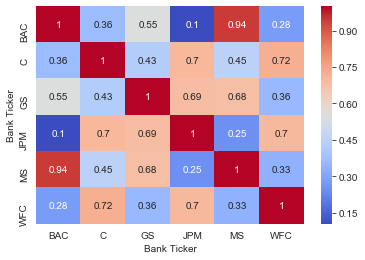

In [260]:
sns.heatmap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).reset_index().corr(),cmap='coolwarm',annot=True)

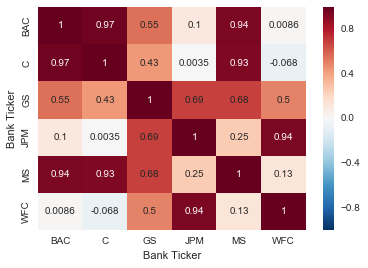

** Optional: Use seaborn's clustermap to cluster the correlations together:**

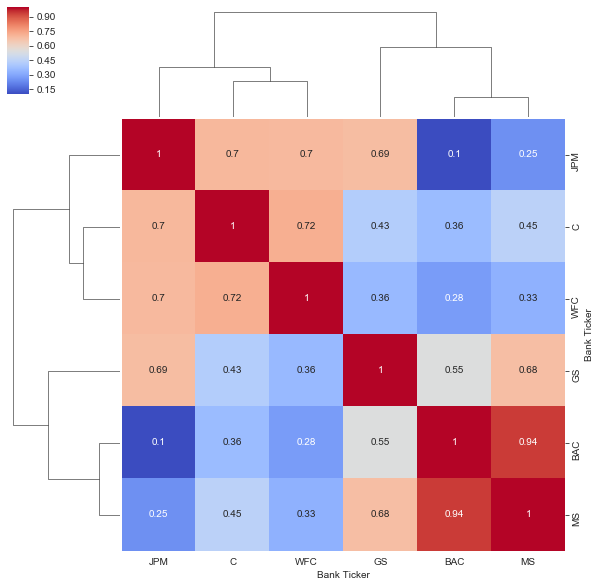

In [262]:
sns.clustermap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),cmap='coolwarm',annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.